Database and table get ready ✅
Sample sales data inserted successfully ✅

Sales Summary:
   product  total_qty  revenue
0   Apples         45    112.5
1  Bananas         60     72.0
2  Oranges         45     81.0


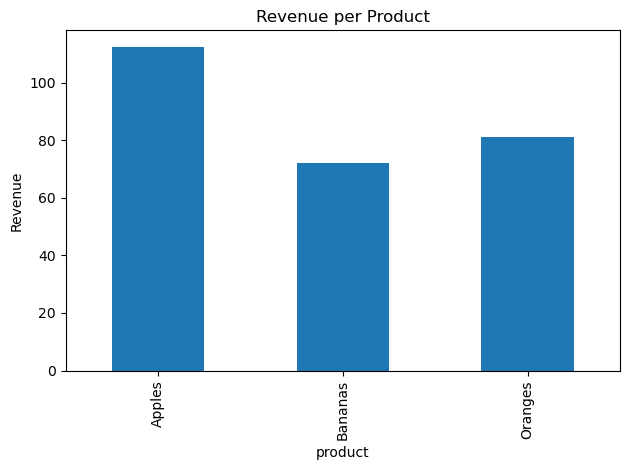

Chart saved as 'sales_chart.png' ✅


In [1]:
# Task 7: Basic Sales Summary from SQLite using Python

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------
# STEP 1: Create Database & Table
# ------------------------
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")
conn.commit()
print("Database and table get ready ✅")

# ------------------------
# STEP 2: Insert Sample Data
# ------------------------
sales_data = [
    ("Apples", 10, 2.5),
    ("Bananas", 8, 1.2),
    ("Oranges", 15, 1.8),
    ("Apples", 5, 2.5),
    ("Bananas", 12, 1.2)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()
print("Sample sales data inserted successfully ✅")

# ------------------------
# STEP 3: Query Sales Summary
# ------------------------
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
print("\nSales Summary:")
print(df)

# ------------------------
# STEP 4: Plot Revenue Chart
# ------------------------
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.ylabel("Revenue")
plt.title("Revenue per Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# Close connection
conn.close()
print("Chart saved as 'sales_chart.png' ✅")
